# Generaliserings fejl
Denne opgave omhandler vigtige koncepter indenfor træning af modeller. Blandt andet modellens fejl der ønskes minimeres.

### Qa) Lidt om generaliserings fejl

I denne opgave vil figuren nedenfor blive beskrevet i detaljer. Figuren stammer fra bogen Deep Learning af forfatterne Aaron Courville, Ian Goodfellow, and Yoshua Bengio.

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-94506/Fildeling/L07/Figs/dl_generalization_error.png" alt="WARNING: you need to be logged into Blackboard to view images" style="height:500px">

Hvis man kigger på akserne på figuren, vil man kunne se at x-aksen beskriver en arbitrær models kapacitet, og y-aksen beskriver dens fejl. Der er desuden tegnet to grafer på figuren, hvor den blå stiplede graf viser fejlen for træningssættet og den grønne indikerer fejlen for valideringssættet (generaliserings fejl). Forfatterne har desuden inddelt grafen i to zoner - underfitting og overfitting zones. Ved underfitting kan det ses, at begge typer fejl kan forbedres ved en forøgelse af kapacitet. Ved overfitting kan det ses, at træningsfejlen går imod 0, men at generaliserings fejlen stiger. Zonerne opdeles af en rød linje, som betegner den optimale kapacitet. Denne findes ved minimum for generaliserings fejlen. Til sidst er der et "generalization gab", som betegner forskellen mellem fejlen på træningssættet og generaliserings fejlen. 

### Qb) Resumé af kode til generering af forhold mellem træningsfejl og generaliserings fejl
I denne opgave er der blevet givet tre kodeceller, som skal forklares. Forklaringen kan ses lige under kodecellerne.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


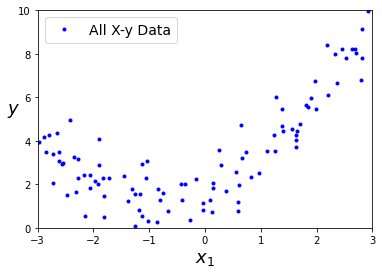

OK


In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

### Qb) fortsat:
Ud fra kodecellen ovenfor ses det, at dataen til den kommende model genereres. Denne gang skabes der noget tilfældigt normalfordelt data med et offset. Y er et 2. grads polynomium med noget støj tilført. Dataen opdeles efterfølgende i trænings- og valideringssæt. Der laves dataprocessering ved at oprette en pipeline, som indeholder `PolynomialFeatures()` og `StandardScaler()`. Designmatricen udvides til at indeholde 90 søjler i stedet for én, for at kunne dække et 90. grads polynomium. Til sidst plottes dataen.

In [2]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

  epoch= 195, mse_train=0.77, mse_val=1.41
  epoch= 196, mse_train=0.77, mse_val=1.41
  epoch= 197, mse_train=0.77, mse_val=1.40
  epoch= 198, mse_train=0.76, mse_val=1.40
  epoch= 199, mse_train=0.76, mse_val=1.40
  epoch= 200, mse_train=0.76, mse_val=1.40
  epoch= 201, mse_train=0.75, mse_val=1.39
  epoch= 202, mse_train=0.75, mse_val=1.39
  epoch= 203, mse_train=0.75, mse_val=1.39
  epoch= 204, mse_train=0.75, mse_val=1.39
  epoch= 205, mse_train=0.74, mse_val=1.39
  epoch= 206, mse_train=0.74, mse_val=1.38
  epoch= 207, mse_train=0.74, mse_val=1.38
  epoch= 208, mse_train=0.74, mse_val=1.38
  epoch= 209, mse_train=0.73, mse_val=1.38
  epoch= 210, mse_train=0.73, mse_val=1.38
  epoch= 211, mse_train=0.73, mse_val=1.37
  epoch= 212, mse_train=0.73, mse_val=1.37
  epoch= 213, mse_train=0.73, mse_val=1.37
  epoch= 214, mse_train=0.72, mse_val=1.37
  epoch= 215, mse_train=0.72, mse_val=1.37
  epoch= 216, mse_train=0.72, mse_val=1.37
  epoch= 217, mse_train=0.72, mse_val=1.36
  epoch= 21

  epoch= 392, mse_train=0.57, mse_val=1.66
  epoch= 393, mse_train=0.57, mse_val=1.67
  epoch= 394, mse_train=0.57, mse_val=1.67
  epoch= 395, mse_train=0.56, mse_val=1.67
  epoch= 396, mse_train=0.56, mse_val=1.67
  epoch= 397, mse_train=0.56, mse_val=1.68
  epoch= 398, mse_train=0.56, mse_val=1.68
  epoch= 399, mse_train=0.56, mse_val=1.68
  epoch= 400, mse_train=0.56, mse_val=1.69
  epoch= 401, mse_train=0.56, mse_val=1.69
  epoch= 402, mse_train=0.56, mse_val=1.69
  epoch= 403, mse_train=0.56, mse_val=1.70
  epoch= 404, mse_train=0.56, mse_val=1.70
  epoch= 405, mse_train=0.56, mse_val=1.70
  epoch= 406, mse_train=0.56, mse_val=1.70
  epoch= 407, mse_train=0.56, mse_val=1.71
  epoch= 408, mse_train=0.56, mse_val=1.71
  epoch= 409, mse_train=0.56, mse_val=1.71
  epoch= 410, mse_train=0.56, mse_val=1.72
  epoch= 411, mse_train=0.56, mse_val=1.72
  epoch= 412, mse_train=0.56, mse_val=1.72
  epoch= 413, mse_train=0.56, mse_val=1.73
  epoch= 414, mse_train=0.56, mse_val=1.73
  epoch= 41

### Qb) fortsat:
I den ovenstående kodecelle ses det, at der først og fremmest defineres en funktion `Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False)`. Denne funktion tager et træningssæt og et valideringssæt og træner en `SGDRegressor` `n_epochs` gange på det samme data. En epoke angiver altså, hvor mange gange modellen er blevet trænet på dataen. Den printer derefter iterations nummeret, mean-squared-error for træningssættet og mean-squared-error på valideringssættet.<br>
Ud fra printet ved kald af funktionen, kan det ses, at `mse_train` falder gennem alle epoker, men at `mse_val` falder indtil omkring 240 epoker, og derefter stiger igen. `mse_train` angiver MSE fejlen for træningssættet og `mse_val` angiver MSE fejlen for valideringssættet.

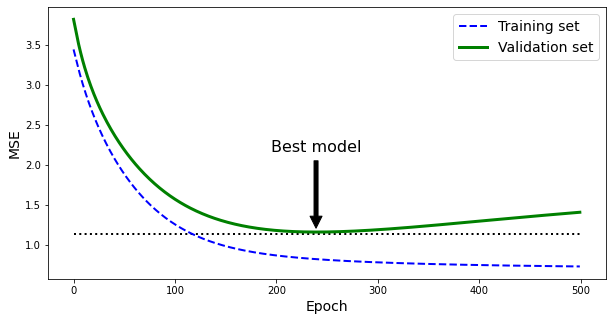

In [3]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.show()

### Qb) fortsat:
Den sidste kodecelle til opgave Qb) ses ovenfor. I denne celle tegnes en graf med MSE fejlen i træningssættet og valideringssættet. Det ses at træningssættets fejl bevæger sig mod 0, men at valideringssættets fejl stiger efter cirka 240 epoker.

### Qc) Early Stopping

Der bliver stillet spørgsmålstegn til, hvordan "early stopping" kunne implementeres i koden fra Qb). Early stopping betyder at træningen stoppes når den bedste model er opnået. Dette findes ved at kigge på fejlen ved ens validation set. Når denne fejl begynder at stige vides det, at den bedste model er opnået.<br>
Pseudo-koden ses nedenfor:

    if(mse_val_current > mse_val_last ):
        stop training!
    else:
        mse_val_last = mse_val_current

### Qd) Forklaring til RMSE-capacity plot
Kodecellen nedenfor blev givet til opgaven. Den tegner et RMSE-capacity plot for lineære regression, der blev arbejdet med i det tidligere opgavesæt til L07. Forklaring til opgaven ses under cellen.

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


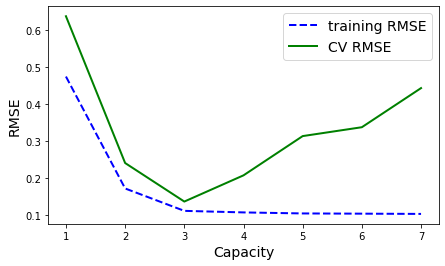

OK


In [4]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qd) fortsat:

Der bliver stillet spørgsmål til hvordan grafen forløber. På figuren ovenfor angiver x-aksen kapaciteten, som er direkte forbundet med den antallet af grader i den lineære regression. Y-aksen beskriver root-mean-squared-error, som er den anvendte cost-function. Det ses at grafen er aftagende indtil en kapacitet på 3 (dvs. et 3. grads polynomium). Træningsfejlen bliver ved med at falde, da en højere kapacitet vil få modellen til at prædiktere meget nøjagtigt ud fra træningsdataen. En stigende kapacitet har dog ulempen, at det på sigt vil gøre modellen overfitted, hvilket vil sige, at den generaliserer dårligt til ny data. Det er det, som ses ved at valideringssættet ved kapacitet > 3 stiger. Her er modellen overfitted.

### Konklusion
Der er i denne opgave opnået kendskab til generaliserings fejl og hvordan den kan hjælpe til at finde den bedst mulige model til den givne opgave. Derudover er forskellige termer indenfor generaliserings fejl blevet vendt og beskrevet. Kapacitet, under- og overfitting er koncepter som tilmed er blevet indbragt i denne opgave. Nogle ad disse koncepter er gået på tværs af flere opgaversæt. 